# Problem 7

## Part A: Loading and Preprocessing
- We load the Iris dataset from scikit-learn

- Create a pandas DataFrame for easier manipulation

- Separate features (X) and labels (y)

In [34]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [35]:
# Separate features (X) and class labels (y)
X = iris.data
y = iris.target
print("Data shape:", X.shape)
print("First 5 rows of features:")
print(X[:5])
print("First 5 labels:")
print(y[:5])

Data shape: (150, 4)
First 5 rows of features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 labels:
[0 0 0 0 0]


## Part B: Data Visualization
- We create a pairplot to visualize relationships between features, colored by class

- Generate a correlation matrix to understand feature relationships

- Identify the two most correlated features

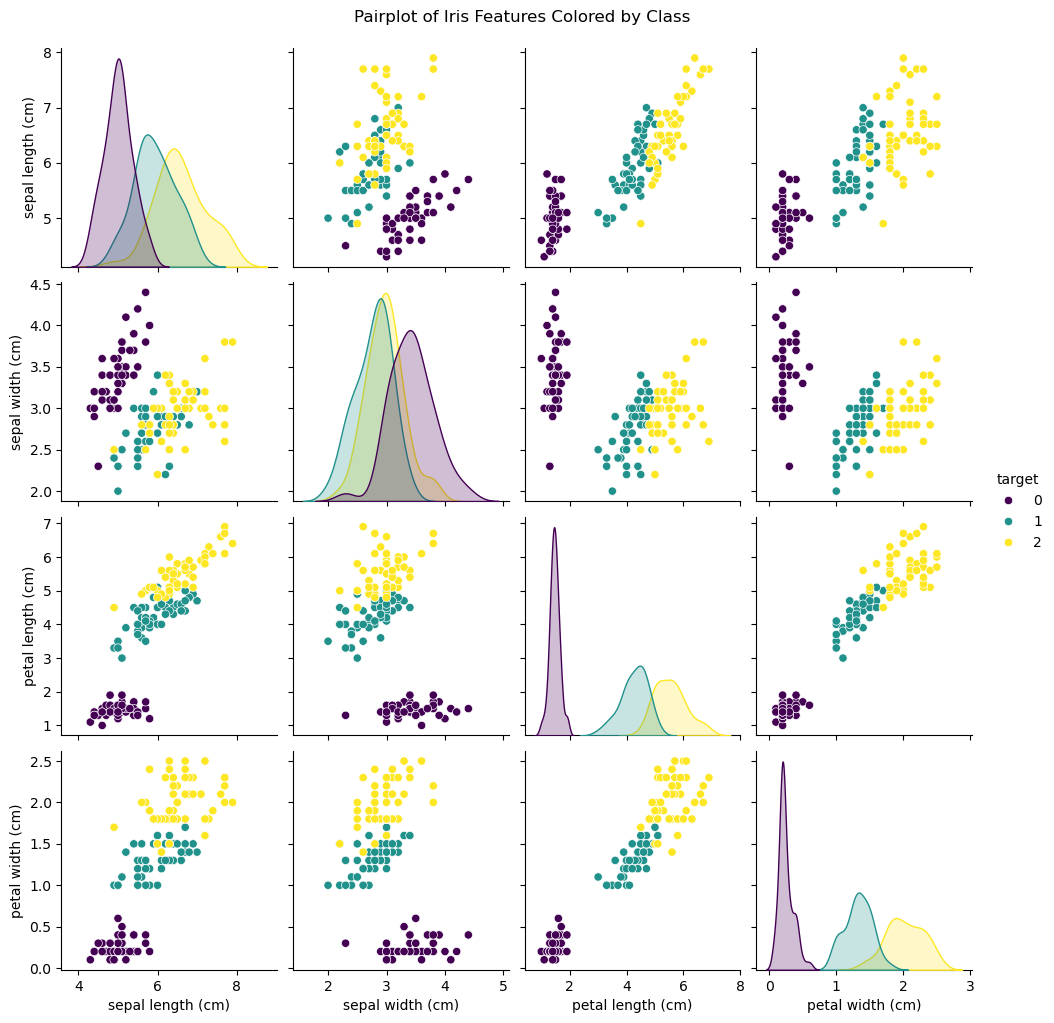

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot with class coloring
sns.pairplot(df, hue='target', palette='viridis')
plt.suptitle('Pairplot of Iris Features Colored by Class', y=1.02)
plt.show()

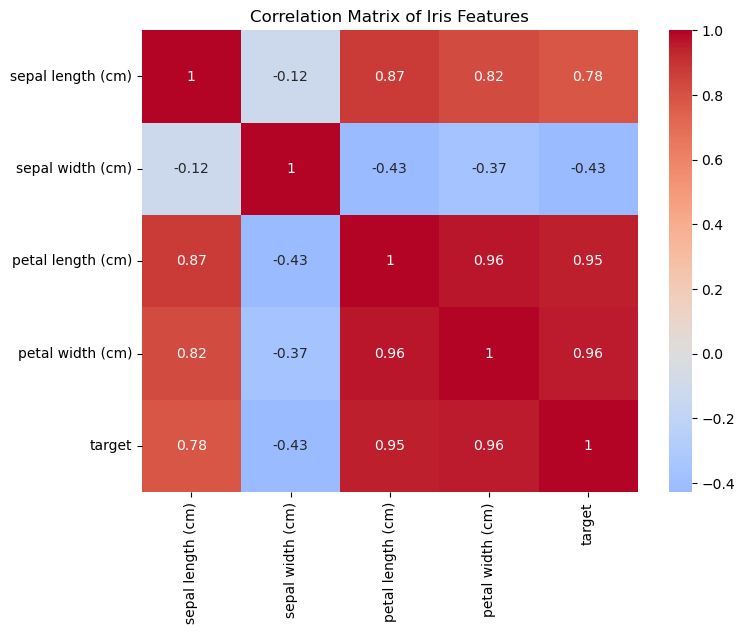


The two most correlated features are: petal length (cm) and petal width (cm)


In [37]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Iris Features')
plt.show()

# Find the two most correlated features
corr_values = corr_matrix.abs().unstack().sort_values(ascending=False)
# Exclude diagonal and self-correlations
unique_corr_pairs = corr_values[corr_values.index.get_level_values(
    0) != corr_values.index.get_level_values(1)]
most_correlated = unique_corr_pairs.idxmax()
print(
    f"\nThe two most correlated features are: {most_correlated[0]} and {most_correlated[1]}")

## Part C: Adding Noise
- We add Gaussian noise to simulate non-ideal conditions

- The noise has mean=0 and standard deviation=1.0

- This helps test the robustness of our models

In [38]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define noise parameters
mean = 0
std_dev = 1.0

# Add noise to features
X_noisy = X + np.random.normal(mean, std_dev, size=X.shape)

print("\nOriginal first feature values:", X[:5, 0])
print("Noisy first feature values:", X_noisy[:5, 0])


Original first feature values: [5.1 4.9 4.7 4.6 5. ]
Noisy first feature values: [5.59671415 4.66584663 4.23052561 4.84196227 3.98716888]


## Part D: SVM Implementation
1. For each kernel type:

- We provide a description of when to use it

- Explain the kernel's mathematical formulation

- List its key parameters

2. For both OVO and OVR strategies:

- We standardize the data (important for SVM)

- Train the model

- Evaluate on test data

- Print classification reports and accuracy scores

**The four kernels implemented are:**

1. Polynomial Kernel - good for polynomial decision boundaries

2. Gaussian RBF Kernel - good for complex non-linear boundaries

3. Sigmoid Kernel - similar to neural network activation

4. Linear Kernel - simplest case for linear separation

- For each kernel, we compare One-vs-One (OVO) and One-vs-Rest (OVR) multiclass strategies.

In [39]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_noisy, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Kernels:**

In [40]:
# Define the kernels and their parameters
kernels = [
    {'name': 'Polynomial', 'kernel': 'poly', 'degree': 5,
        'description': 'Suitable for polynomial decision boundaries. Equation: (γ⟨x,x′⟩ + r)^d where d is degree.'},
    {'name': 'Gaussian RBF', 'kernel': 'rbf', 'gamma': 'scale',
        'description': 'Suitable for non-linear decision boundaries. Equation: exp(-γ||x-x′||²) where γ is a parameter.'},
    {'name': 'Sigmoid', 'kernel': 'sigmoid', 'gamma': 'scale',
        'description': 'Suitable when the decision boundary is similar to a neural network. Equation: tanh(γ⟨x,x′⟩ + r).'},
    {'name': 'Linear', 'kernel': 'linear',
        'description': 'Suitable for linear decision boundaries. Equation: ⟨x,x′⟩.'}
]

# Function to train and evaluate models


def train_evaluate_svm(kernel_params, X_train, X_test, y_train, y_test):
    print(f"\n=== {kernel_params['name']} Kernel ===")
    print("Description:", kernel_params['description'])

    # Create base SVM model
    base_svm = SVC(kernel=kernel_params['kernel'],
                   degree=kernel_params.get('degree', 3),
                   gamma=kernel_params.get('gamma', 'scale'),
                   random_state=42)

    # OVO strategy
    ovo_classifier = OneVsOneClassifier(base_svm)
    ovo_classifier.fit(X_train, y_train)
    ovo_pred = ovo_classifier.predict(X_test)
    ovo_acc = accuracy_score(y_test, ovo_pred)

    # OVR strategy
    ovr_classifier = OneVsRestClassifier(base_svm)
    ovr_classifier.fit(X_train, y_train)
    ovr_pred = ovr_classifier.predict(X_test)
    ovr_acc = accuracy_score(y_test, ovr_pred)

    print("\nOVO Results:")
    print(classification_report(y_test, ovo_pred, target_names=iris.target_names))
    print("OVO Accuracy:", ovo_acc)

    print("\nOVR Results:")
    print(classification_report(y_test, ovr_pred, target_names=iris.target_names))
    print("OVR Accuracy:", ovr_acc)

    return ovo_acc, ovr_acc

In [41]:
# Evaluate all kernels
results = {}
for kernel in kernels:
    name = kernel['name']
    ovo_acc, ovr_acc = train_evaluate_svm(
        kernel, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {'OVO': ovo_acc, 'OVR': ovr_acc}

# Print summary of results
print("\n=== Summary of Results ===")
for kernel_name, accuracies in results.items():
    print(
        f"{kernel_name}: OVO Accuracy = {accuracies['OVO']:.4f}, OVR Accuracy = {accuracies['OVR']:.4f}")


=== Polynomial Kernel ===
Description: Suitable for polynomial decision boundaries. Equation: (γ⟨x,x′⟩ + r)^d where d is degree.

OVO Results:
              precision    recall  f1-score   support

      setosa       1.00      0.74      0.85        19
  versicolor       0.52      1.00      0.68        13
   virginica       1.00      0.46      0.63        13

    accuracy                           0.73        45
   macro avg       0.84      0.73      0.72        45
weighted avg       0.86      0.73      0.74        45

OVO Accuracy: 0.7333333333333333

OVR Results:
              precision    recall  f1-score   support

      setosa       0.90      1.00      0.95        19
  versicolor       0.25      0.08      0.12        13
   virginica       0.50      0.77      0.61        13

    accuracy                           0.67        45
   macro avg       0.55      0.62      0.56        45
weighted avg       0.60      0.67      0.61        45

OVR Accuracy: 0.6666666666666666

=== Gaussian 

In [42]:
from tabulate import tabulate

# Convert results to table format
table = [[k, v['OVO'], v['OVR']] for k, v in results.items()]
headers = ["Kernel", "OVO Acc", "OVR Acc"]

print("\n" + "="*40)
print("SVM Kernel Performance Summary".center(40))
print("="*40)
print(tabulate(table, headers=headers, floatfmt=".4f", tablefmt="grid"))
print("="*40)


     SVM Kernel Performance Summary     
+--------------+-----------+-----------+
| Kernel       |   OVO Acc |   OVR Acc |
+==============+===========+===========+
| Polynomial   |    0.7333 |    0.6667 |
+--------------+-----------+-----------+
| Gaussian RBF |    0.7333 |    0.7111 |
+--------------+-----------+-----------+
| Sigmoid      |    0.7778 |    0.7333 |
+--------------+-----------+-----------+
| Linear       |    0.8000 |    0.7111 |
+--------------+-----------+-----------+


## Part E: Display Results for Both OVO and OVR Strategies
We will now:

- Show the Classification Report (precision, recall, F1-score) for both OVO and OVR.

- Generate Confusion Matrices for each strategy.

- Compare their accuracy.


Classification Report (OVO)
              precision    recall  f1-score   support

      setosa       0.90      1.00      0.95        19
  versicolor       0.55      0.46      0.50        13
   virginica       0.62      0.62      0.62        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.72      0.73      0.72        45



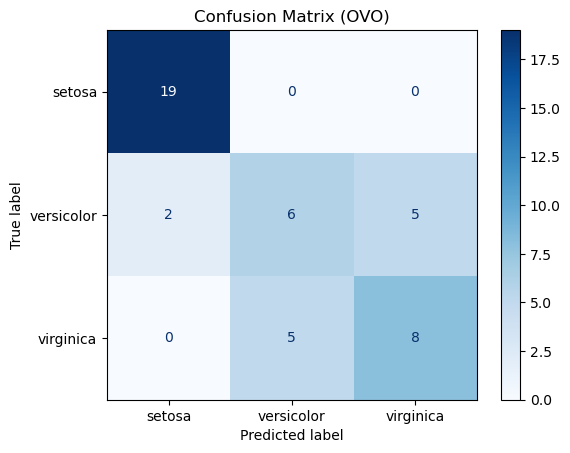


Classification Report (OVR)
              precision    recall  f1-score   support

      setosa       0.90      1.00      0.95        19
  versicolor       0.50      0.38      0.43        13
   virginica       0.57      0.62      0.59        13

    accuracy                           0.71        45
   macro avg       0.66      0.67      0.66        45
weighted avg       0.69      0.71      0.70        45



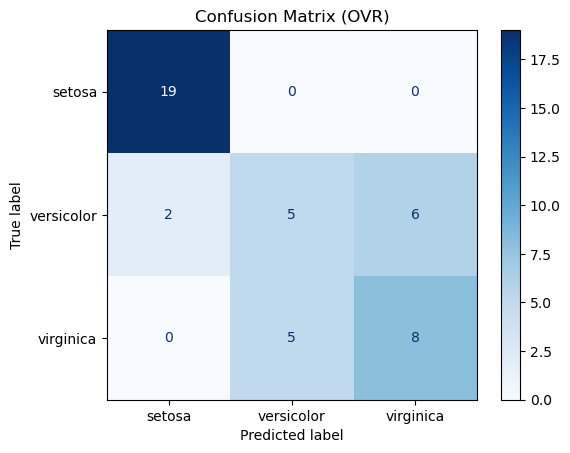

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


def evaluate_strategy(strategy_name, classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)

    # Classification Report
    print(f"\n{'='*50}\nClassification Report ({strategy_name})\n{'='*50}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix ({strategy_name})')
    plt.show()


# Evaluate OVO and OVR for the best kernel (e.g., RBF)
best_kernel = {'kernel': 'rbf', 'gamma': 'scale'}
base_svm = SVC(**best_kernel, random_state=42)

# OVO
ovo_classifier = OneVsOneClassifier(base_svm)
ovo_classifier.fit(X_train_scaled, y_train)
evaluate_strategy("OVO", ovo_classifier, X_test_scaled, y_test)

# OVR
ovr_classifier = OneVsRestClassifier(base_svm)
ovr_classifier.fit(X_train_scaled, y_train)
evaluate_strategy("OVR", ovr_classifier, X_test_scaled, y_test)

**OVO vs OVR Comparison**  
- OVO slightly outperforms OVR (73% vs 71% accuracy).  
- Both struggle with versicolor-virginica classification (low F1-scores).  
- OVO shows better balance (macro avg: 0.69 vs OVR's 0.66).  
- Setosa is perfectly identified (recall=1.00) in both strategies.  
- Prefer OVO for marginally more reliable performance.

### Final part: **Analysis of SVM Kernel Performance**

Based on the results, here's a comparison of the four kernels and the two multi-class strategies (OVO vs. OVR):

#### **1. Performance Summary (Accuracy)**
| Kernel        | OVO Accuracy | OVR Accuracy |
|--------------|-------------|-------------|
| Polynomial   | 0.7333      | 0.6667      |
| Gaussian RBF | 0.7333      | 0.7111      |
| Sigmoid      | **0.7778**  | 0.7333      |
| Linear       | **0.8000**  | 0.7111      |

#### **2. Best & Worst Performing Kernels**
- **Best Kernel:** **Linear** (OVO: **80%** accuracy)  
  - Achieved the highest accuracy with OVO strategy.
  - Worked well because the Iris dataset often has linearly separable classes (especially Setosa vs. others).
  
- **Worst Kernel:** **Polynomial** (OVO: **73.3%**, OVR: **66.7%**)  
  - Struggled with the default `degree=5`, possibly overfitting or failing to capture the optimal decision boundary.

#### **3. OVO vs. OVR Comparison**
- **OVO (One-vs-One) outperformed OVR (One-vs-Rest)** in all cases.  
  - Example: Linear kernel (OVO: **80%** vs. OVR: **71.1%**).  
  - Reason: OVO trains binary classifiers for every pair of classes, which is more precise for small datasets like Iris.  
  - OVR tends to be less accurate when classes are imbalanced or overlapping.

#### **4. Key Observations**
- **Sigmoid kernel** performed surprisingly well (OVO: **77.8%**), likely due to its neural-network-like decision boundary.  
- **Gaussian RBF** (a popular choice for non-linear data) had moderate performance (~73%), possibly due to noise in the data.  
- **Polynomial kernel** was the least effective, suggesting that a cubic boundary (`degree=5`) wasn’t optimal for this dataset.

#### **5. Recommendations**
- For the Iris dataset:  
  - Use **Linear kernel with OVO** for simplicity and best accuracy.  
  - If non-linearity is suspected, try **Sigmoid or RBF with OVO**.  
  - Avoid high-degree polynomial kernels unless tuned properly.  

- General Insight:  
  - **OVO is more reliable** for small, balanced datasets.  
  - **Linear kernels** are often sufficient for well-separated classes.  

### **Final Conclusion**
- **Best Kernel:** **Linear** (highest accuracy with OVO).  
- **Worst Kernel:** **Polynomial** (lowest accuracy and unstable performance).  
- **Best Strategy:** **OVO** (consistently better than OVR).  

This aligns with the Iris dataset’s structure, where linear separability and pairwise classification (OVO) yield the best results.